In [1]:
from config import api_key
from googleapiclient.discovery import build
import pandas as pd
import json
import requests
import datetime
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv("../Resources/US_youtube_trending_data.csv")
print(f"The standard deviation of all video's view count is: {round(df['view_count'].std(),2)}")
print(f"The standard deviation of all video's like count is: {round(df['likes'].std(),2)}")
print(f"The standard deviation of all video's comment count is: {round(df['comment_count'].std(),2)}")


The standard deviation of all video's view count is: 12966191.08
The standard deviation of all video's like count is: 489923.38
The standard deviation of all video's comment count is: 80636.31


In [3]:
df.columns

Index(['categoryId', 'trending_date', 'view_count', 'likes', 'dislikes',
       'comment_count', 'category'],
      dtype='object')

In [4]:
# Drop unnecessary columns
# df = df.drop(columns=['video_id', 'title','publishedAt', 'channelId', 'channelTitle','tags','thumbnail_link', 'comments_disabled', \
#        'ratings_disabled', 'description'])

# # Save the reduced dataset
# df.to_csv('../Resources/US_youtube_trending_data.csv', index=False)

#df = df.sample(frac=0.31, random_state=42)  # Change 0.1 to the fraction you want

# Save the sampled dataset
#df.to_csv('../Resources/US_youtube_trending_data.csv', index=False)

In [5]:
import json
with open("../Resources/US_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [6]:
category_list = []
for id_ in df.categoryId:
    category_list.append(ID_to_Category[id_])
category = pd.Series(category_list)
category
df["category"] = category

In [7]:
categories1 = df.category.value_counts()
categories1

category
Entertainment            500
Gaming                   465
Music                    385
Sports                   287
People & Blogs           226
Comedy                   125
Film & Animation         117
News & Politics           94
Science & Technology      81
Education                 65
Howto & Style             64
Autos & Vehicles          52
Travel & Events           16
Pets & Animals            11
Nonprofits & Activism      1
Name: count, dtype: int64

In [8]:
youtube = build('youtube','v3',developerKey=api_key)

In [9]:
request = youtube.videoCategories().list(
        part="snippet",
        regionCode="US")
response = request.execute()
pprint(response)

{'etag': 'QteLrrS_X7rM7rlcU_e7qa0embQ',
 'items': [{'etag': 'grPOPYEUUZN3ltuDUGEWlrTR90U',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': 'Q0xgUf8BFM8rW3W0R9wNq809xyA',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': 'qnpwjh5QlWM5hrnZCvHisquztC4',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
           {'etag': 'HyFIixS5BZaoBdkQdLzPdoXWipg',
            'id': '15',
            'kind': 'youtube#videoCategory',
 

In [10]:
category_number = []
categories = []
x = 0
for item in response["items"]:
    category_number.append(response["items"][x]["id"])
    categories.append(response["items"][x]["snippet"]["title"])
    x = x + 1
    

category_index = {}
for key in category_number:
    for value in categories:
        category_index[key] = value
        categories.remove(value)
        break
category_index.pop("18")
category_number.remove("18")
category_index.pop("19")
category_number.remove("19")
category_index.pop("21")
category_number.remove("21")
category_index.pop("27")
category_number.remove("27")
category_index.pop("30")
category_number.remove("30")
category_index.pop("31")
category_number.remove("31")
category_index.pop("32")
category_number.remove("32")
category_number.remove("33")
category_index.pop("33")
category_number.remove("34")
category_index.pop("34")
category_number.remove("35")
category_index.pop("35")
category_number.remove("36")
category_index.pop("36")
category_number.remove("37")
category_index.pop("37")
category_number.remove("38")
category_index.pop("38")
category_number.remove("39")
category_index.pop("39")
category_number.remove("40")
category_index.pop("40")
category_number.remove("41")
category_index.pop("41")
category_number.remove("42")
category_index.pop("42")
category_number.remove("43")
category_index.pop("43")
category_number.remove("44")
category_index.pop("44")
print(category_index)

x = 0

print(category_number)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '20': 'Gaming', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '28': 'Science & Technology', '29': 'Nonprofits & Activism'}
['1', '2', '10', '15', '17', '20', '22', '23', '24', '25', '26', '28', '29']


In [11]:
index_df = pd.DataFrame({"Genre":category_index},index = category_number)
index_df["Index"] = category_number
index_numbers_df = index_df["Index"]

In [12]:
likes = {}
views = {}
for row in index_df["Genre"]:
    likes[row] = []   
    views[row] = []

In [13]:
n = 0
x = 0
y = 0
for row in index_df["Genre"]:
    request = youtube.videos().list(
        part="statistics",
        chart="mostPopular",
        regionCode="US",
        videoCategoryId=index_numbers_df.iloc[n]
        )
    response = request.execute()
    for item in response["items"]:
        try:
            likes[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["likeCount"])
            views[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["viewCount"])
            x = x + 1
        except KeyError:
            likes[(index_df["Genre"].iloc[y])].append("0")
            views[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["viewCount"])
            x = x + 1
    y = y + 1
    x = 0
    n = n + 1
print(likes)
print(views)

{'Film & Animation': ['550324', '937675', '435077', '216755', '187062'], 'Autos & Vehicles': ['283698', '149573', '941120', '151394', '153109'], 'Music': ['136747', '449474', '728217', '64518', '99558'], 'Pets & Animals': ['763985', '477415', '517694', '1405107', '497153'], 'Sports': ['753850', '781989', '426099', '2717506', '2532524'], 'Gaming': ['127718', '27930', '47595', '14752', '4058'], 'People & Blogs': ['0', '47176', '19427', '13096', '8079'], 'Comedy': ['1275391', '1573053', '1065470', '584897', '186434'], 'Entertainment': ['1568157', '378074', '687137', '1275391', '1573053'], 'News & Politics': ['34742', '107415', '617', '41411', '656496'], 'Howto & Style': ['874821', '763985', '855528', '865264', '283698'], 'Science & Technology': ['0', '127417', '72498', '139682', '323809'], 'Nonprofits & Activism': ['543']}
{'Film & Animation': ['7099499', '10054634', '9909032', '3056094', '2747460'], 'Autos & Vehicles': ['5382739', '2663313', '27890883', '4281660', '5761432'], 'Music': ['

In [14]:
views["Nonprofits & Activism"].append("0")
likes["Nonprofits & Activism"].append("0")
print(views["Nonprofits & Activism"])

['47706', '0']


In [15]:
df_views = pd.DataFrame.from_dict(views, orient='index').transpose()
df_likes = pd.DataFrame.from_dict(likes, orient='index').transpose()

# Combine into a single DataFrame
merged_data_df = pd.concat([df_views, df_likes], keys=['Views', 'Likes'], axis=1)

# Preview the DataFrame

In [16]:
merged_data_df.head()

Views                                                      \
  Film & Animation Autos & Vehicles     Music Pets & Animals    Sports   
0          7099499          5382739   2494395       11599148  20218766   
1         10054634          2663313   4061146        6053273   9989058   
2          9909032         27890883  11901220       22563208   8473634   
3          3056094          4281660   1504677       22039933  57889825   
4          2747460          5761432   3480582        6510104  55444645   

                                                                   ...  \
    Gaming People & Blogs    Comedy Entertainment News & Politics  ...   
0  1866619        3213934  18043785      20497698         1272875  ...   
1   466094         784643  23195175       8405470         3120917  ...   
2   801461         199601  18847136      10626501          542996  ...   
3   558137         405461   7882817      18043785          591592  ...   
4   316673         222693   4682571      23195175        12029441  ...   

           Likes                                                         \
  Pets & Animals   Sports  Gaming People & Blogs   Comedy Entertainment   
0         763985   753850  127718              0  1275391       1568157   
1         477415   781989   27930          47176  1573053        378074   
2         517694   426099   47595          19427  1065470        687137   
3        1405107  2717506   14752          13096   584897       1275391   
4         497153  2532524    4058           8079   186434       1573053   

                                                                            
  News & Politics Howto & Style Science & Technology Nonprofits & Activism  
0           34742        874821                    0                   543  
1          107415        763985               127417                     0  
2             617        855528                72498                  None  
3           41411        865264               139682                  None  
4          656496        283698               323809                  None  

[5 rows x 26 columns]

In [17]:
# Convert all relevant columns to numeric values, coercing errors to NaN
merged_data_df = merged_data_df.apply(pd.to_numeric, errors='coerce')

# Calculate total views for each category
total_views = merged_data_df.filter(like='Views').sum()

# Calculate total likes for each category
total_likes = merged_data_df.filter(like='Likes').sum()

# Create a new DataFrame to store the results
total_summary_df = pd.DataFrame({
    'Category': total_views.index,
    'Total_Views': total_views.values,
    'Total_Likes': total_likes.values
})


total_summary_df['Category'] = total_summary_df['Category'].apply(lambda x: x[1] if isinstance(x, tuple) else x)

# Display the updated DataFrame
total_summary_df.head()
# Display the result


,Category,Total_Views,Total_Likes
0,Film & Animation,32866719.0,2326893.0
1,Autos & Vehicles,45980027.0,1678894.0
2,Music,23442020.0,1478514.0
3,Pets & Animals,68765666.0,3661354.0
4,Sports,152015928.0,7211968.0


In [18]:
total_summary_df['view_to_like_ratio'] = total_summary_df['Total_Likes'] / total_summary_df['Total_Views']
total_summary_df.tail()

,Category,Total_Views,Total_Likes,view_to_like_ratio
8,Entertainment,80768629.0,5481812.0,0.067871
9,News & Politics,17557821.0,840681.0,0.047881
10,Howto & Style,65430847.0,3643296.0,0.055682
11,Science & Technology,15958826.0,663406.0,0.041570
12,Nonprofits & Activism,47706.0,543.0,0.011382


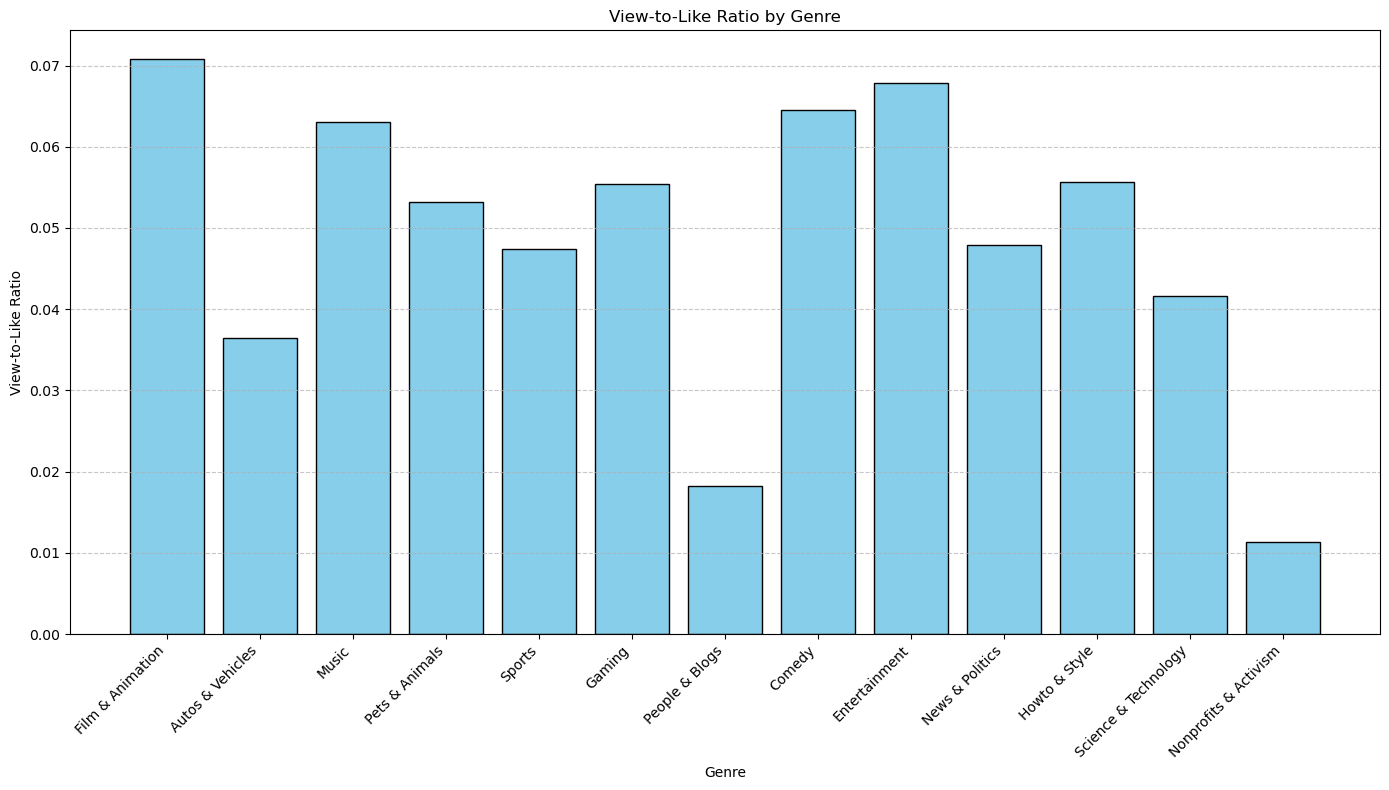

In [19]:
plt.figure(figsize=(14, 8))
plt.bar(total_summary_df['Category'], total_summary_df['view_to_like_ratio'], color='skyblue', edgecolor='black')
plt.title('View-to-Like Ratio by Genre')
plt.xlabel('Genre')
plt.ylabel('View-to-Like Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

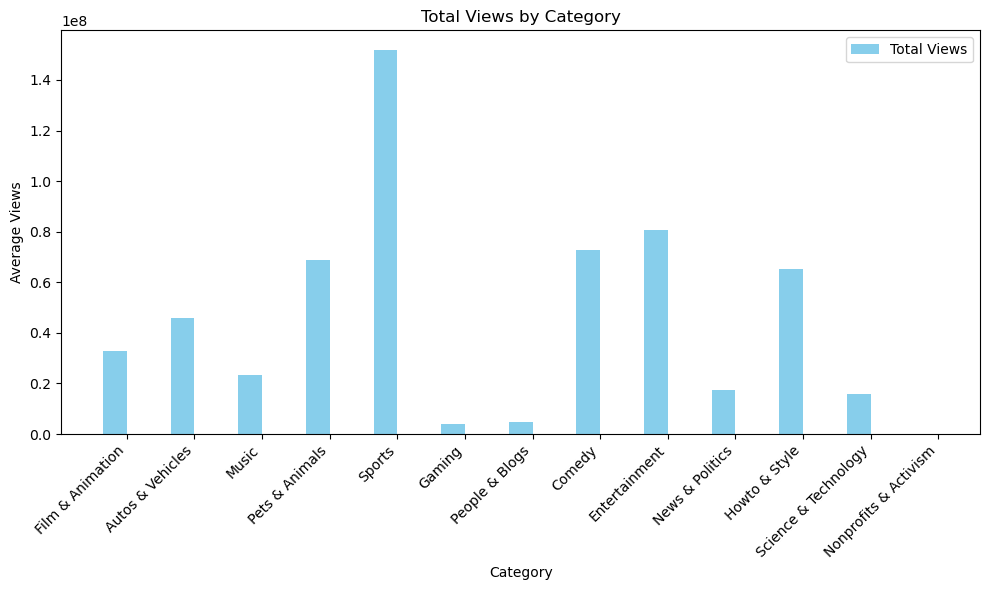

In [20]:
x = np.arange(len(total_summary_df['Category']))  # The label locations
width = 0.35  # The width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Total Views and Total Likes
bars1 = ax.bar(x - width/2, total_summary_df['Total_Views'], width, label='Total Views', color='skyblue')


# Set labels, title, and custom x-axis tick labels
ax.set_xlabel('Category')
ax.set_ylabel('Average Views')
ax.set_title('Total Views by Category')
ax.set_xticks(x)
ax.set_xticklabels(total_summary_df['Category'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

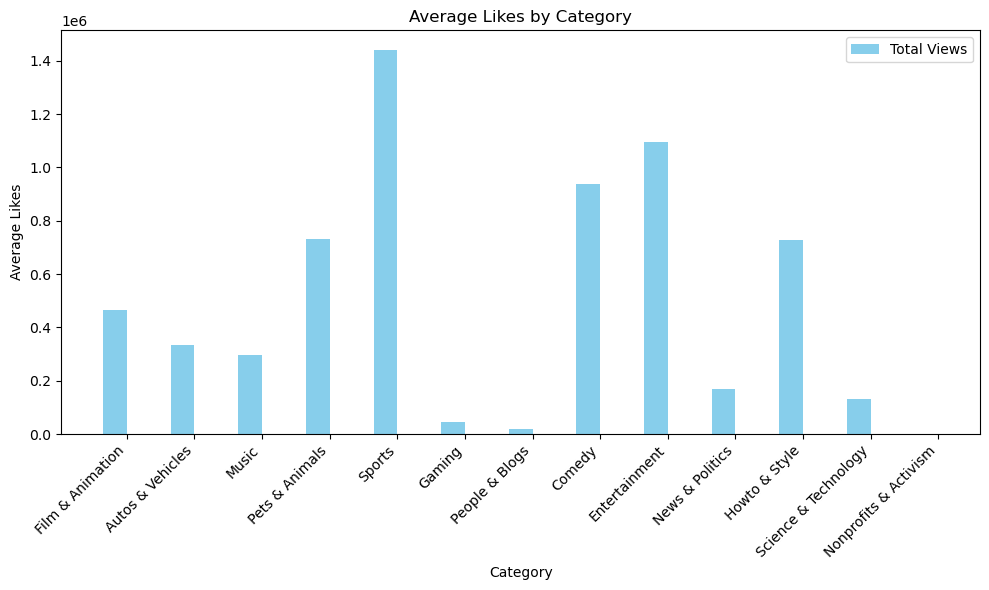

In [21]:
x = np.arange(len(total_summary_df['Category']))  # The label locations
width = 0.35  # The width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Total Views and Total Likes
bars1 = ax.bar(x - width/2, total_summary_df['Total_Likes'] // 5, width, label='Total Views', color='skyblue')


# Set labels, title, and custom x-axis tick labels
ax.set_xlabel('Category')
ax.set_ylabel('Average Likes')
ax.set_title('Average Likes by Category')
ax.set_xticks(x)
ax.set_xticklabels(total_summary_df['Category'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
df.head()

,categoryId,trending_date,view_count,likes,dislikes,comment_count,category
20413,24,2022-11-18T00:00:00Z,17051917,2257911,0,123820,NaN
19510,20,2020-12-02T00:00:00Z,6067759,325577,6472,25973,NaN
4391,24,2022-04-05T00:00:00Z,2387482,149258,0,3296,Sports
10296,20,2022-08-15T00:00:00Z,1364244,75343,0,7426,NaN
10610,17,2021-05-04T00:00:00Z,274402,11715,286,1504,NaN


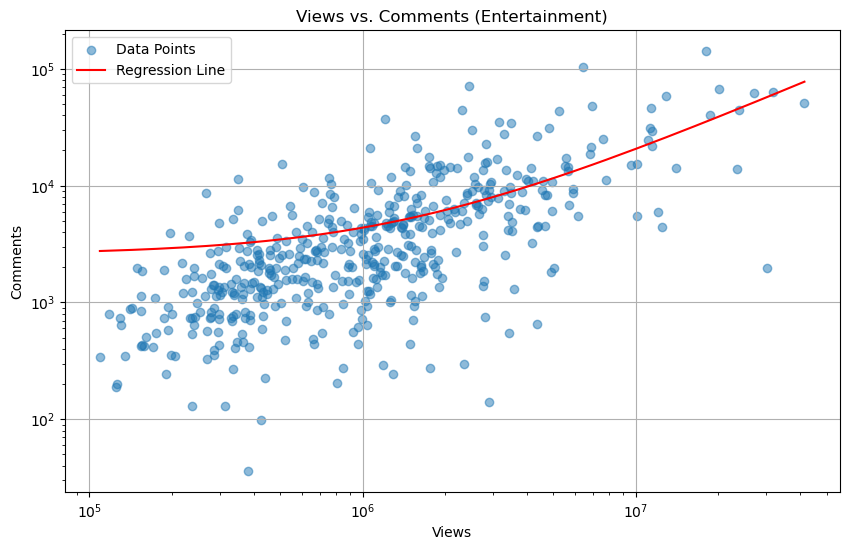

In [23]:
# Filter and prepare the data
entertainment_data = df[df['category'] == 'Entertainment']
entertainment_data = entertainment_data.dropna(subset=['view_count', 'comment_count'])
entertainment_data['view_count'] = pd.to_numeric(entertainment_data['view_count'])
entertainment_data['comment_count'] = pd.to_numeric(entertainment_data['comment_count'])

# Extract relevant columns
entertainment_vc = entertainment_data['view_count']
entertainment_cc = entertainment_data['comment_count']

# Perform regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(entertainment_vc, entertainment_cc)
regress_values = entertainment_vc * slope + intercept

# Sort the values to ensure the regression line is plotted correctly
sorted_indices = entertainment_vc.argsort()
entertainment_vc_sorted = entertainment_vc.iloc[sorted_indices]
regress_values_sorted = regress_values.iloc[sorted_indices]

# Plot the scatterplot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(entertainment_vc, entertainment_cc, alpha=0.5, label='Data Points')
plt.plot(entertainment_vc_sorted, regress_values_sorted, "r-", label='Regression Line')
plt.title('Views vs. Comments (Entertainment)')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

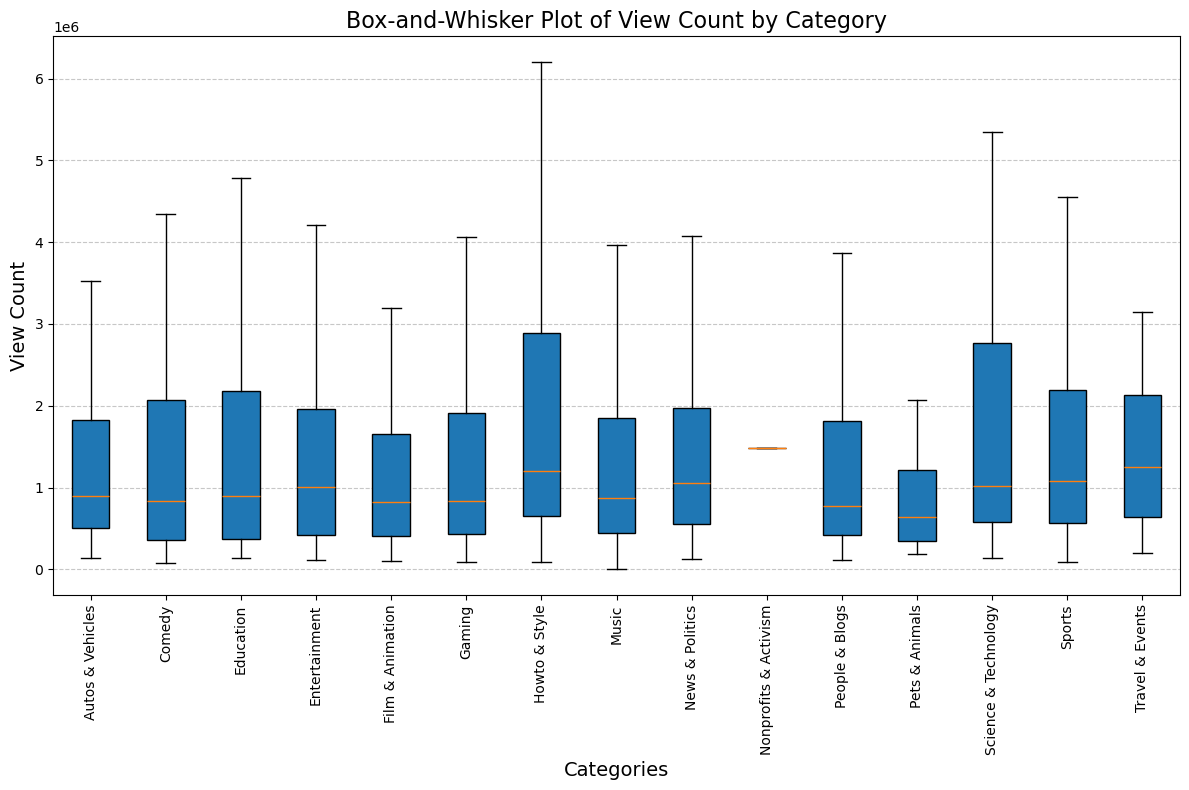

In [24]:

# Group the data by 'category' and collect the 'view_count' for each category
categories = df.groupby('category')['view_count'].apply(list)

# Prepare data for the box plot
data_to_plot = [categories[cat] for cat in categories.index]
labels = categories.index

# Create the box-and-whisker plot
plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, labels=labels, patch_artist=True, showfliers=False)

# Customize the plot
plt.title('Box-and-Whisker Plot of View Count by Category', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('View Count', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_15328\3782611527.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_liked_videos = df.groupby('category').apply(lambda x: x.nlargest(10, 'likes')).reset_index(drop=True)


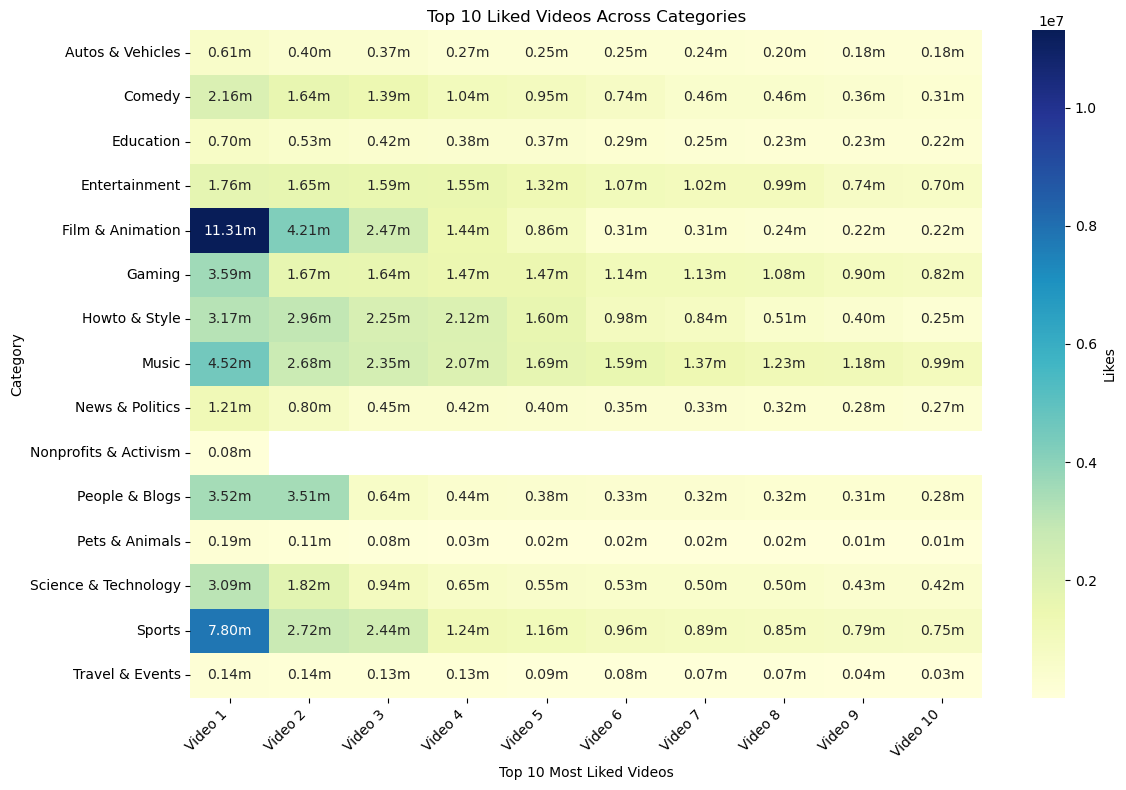

In [25]:
# Function to format numbers as '1.23m'
def format_millions(x, pos):
    return f'{x*1e-6:.2f}m'

# Get the top 10 liked videos for each category
top_10_liked_videos = df.groupby('category').apply(lambda x: x.nlargest(10, 'likes')).reset_index(drop=True)

# Create a placeholder index for the top 10 videos
top_10_liked_videos['rank'] = top_10_liked_videos.groupby('category').cumcount() + 1

# Pivot the data to get categories as rows and rank (1-10) as columns
heatmap_data = top_10_liked_videos.pivot(index='category', columns='rank', values='likes')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap='YlGnBu', cbar_kws={'label': 'Likes'}, 
            annot_kws={'size': 10}, xticklabels=[f'Video {i}' for i in range(1, 11)], 
            yticklabels=heatmap_data.index)

# Apply the formatting for the annotations
for text in plt.gca().texts:
    text.set_text(format_millions(float(text.get_text()), None))

# Title and labels
plt.title('Top 10 Liked Videos Across Categories')
plt.ylabel('Category')
plt.xlabel('Top 10 Most Liked Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()